In [161]:
import nltk
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.cm as cm
import numpy as np
from matplotlib import rcParams
import collections
from collections import Counter 
from sklearn.model_selection import train_test_split

###  Read from tsv file

Open train2017.tsv file and store it into pandas dataframe

In [162]:
Location = 'Project/twitter_data/train2017.tsv'
df = pd.read_csv(Location,sep='\t',names=['id1','id2','category','twitter_text'])
df_test=pd.read_csv('Project/twitter_data/test2017.tsv',sep='\t',names=['id1','id2','category','twitter_text'])
df_labels=pd.read_csv('Project/twitter_data/SemEval2017_task4_subtaskA_test_english_gold.txt',sep='\t',names=['id1','category'])

## Clean data 
Remove links,tags,emojis,emoticons,pancuation,numbers and stopwords

In [163]:
with open('our_stopwords.txt') as file:
    contents = file.read()
    

In [164]:
cleaned_list=[]
twitter_text_list=list(df['twitter_text'])

#We believe we don't need time words to show the context that reveales the sentiment of our data so we added
#them to our_stopwords.txt


for text in twitter_text_list:
    text =' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    text = ''.join([i for i in text if not i.isdigit()]) #we remove digits to plot more meaningful context
    tokens = word_tokenize(text)
    text = ' '.join([w.lower() for w in tokens if not w in set(stopwords.words('english'))])
    tokens = word_tokenize(text)
    text = ' '.join([w.lower() for w in tokens if not w in contents])
    cleaned_list.append(text)

## Wordcloud
### Project the most common words with wordcloud

<Figure size 1440x432 with 0 Axes>

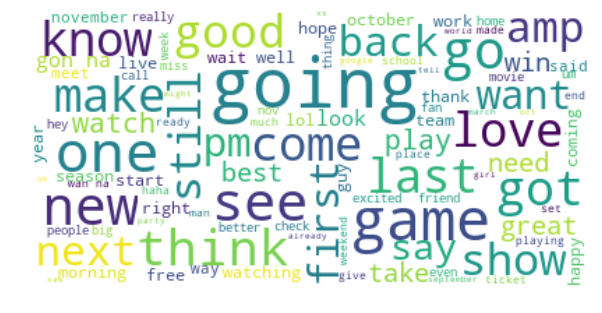

In [165]:
wordcloud_text=' '.join(cleaned_list)  
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(wordcloud_text)
plt.figure()
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

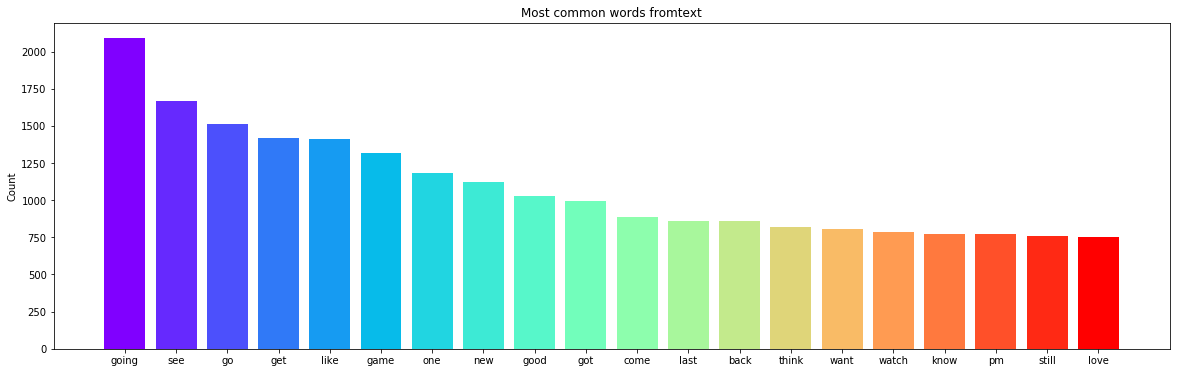

In [166]:
import collections
from collections import Counter 
from matplotlib.pyplot import figure

data_set =wordcloud_text 
  
# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts.

most_occur = Counter.most_common(20) 
value_list=[]
count_list=[]

for value,count in most_occur:
    value_list.append(value)
    count_list.append(count)

y_positions=range(len(value_list))
colors = cm.rainbow(np.linspace(0, 1, len(y_positions)))
plt.bar(y_positions,count_list,color=colors)
plt.xticks(y_positions,value_list)
plt.ylabel("Count")
plt.title("Most common words fromtext")
plt.rcParams['figure.figsize']=(20,6)
plt.show()

### Project the most common words in positive tweets 

<Figure size 1440x432 with 0 Axes>

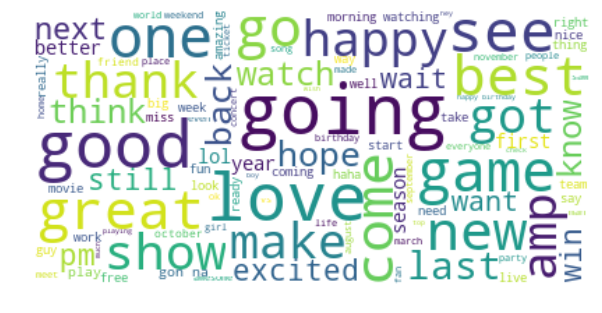

In [167]:
df['twitter_text']=cleaned_list
positive_list=[]
for index, row in df.iterrows():
    if (row['category']=="positive"):
        #print row['twitter_text']
        positive_list.append(row['twitter_text'])

positive_text=' '.join(positive_list)


wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(positive_text)
plt.figure()
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Bar plot of most common words in positive tweets
This bar plot shows the most common words from positive tweets and how many times they appear on

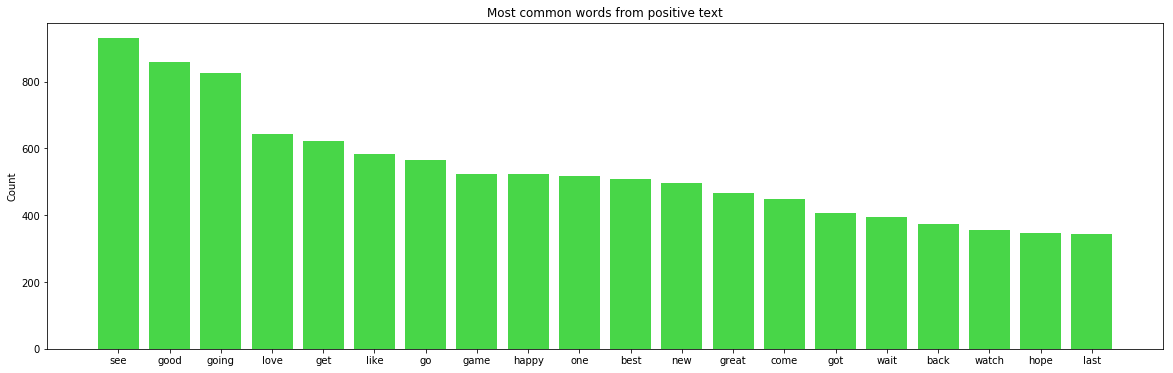

In [168]:
import collections
from collections import Counter 
from matplotlib.pyplot import figure

data_set =positive_text 
  
# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts.

most_occur = Counter.most_common(20) 
value_list=[]
count_list=[]

for value,count in most_occur:
    value_list.append(value)
    count_list.append(count)

y_positions=range(len(value_list))

plt.bar(y_positions,count_list,color=(0.1, 0.8, 0.1,0.8))
plt.xticks(y_positions,value_list)
plt.ylabel("Count")
plt.title("Most common words from positive text")
plt.rcParams['figure.figsize']=(20,6)
plt.show()

### Project the most common words in negative tweet

<Figure size 1440x432 with 0 Axes>

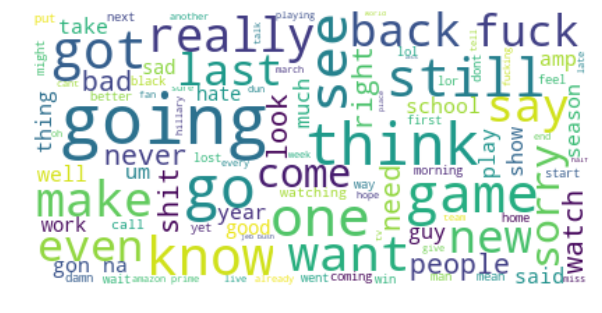

In [169]:
df['twitter_text']=cleaned_list
negative_list=[]
for index, row in df.iterrows():
    if (row['category']=="negative"):
        negative_list.append(row['twitter_text'])
        
negative_text=' '.join(negative_list)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(negative_text)
plt.figure()
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

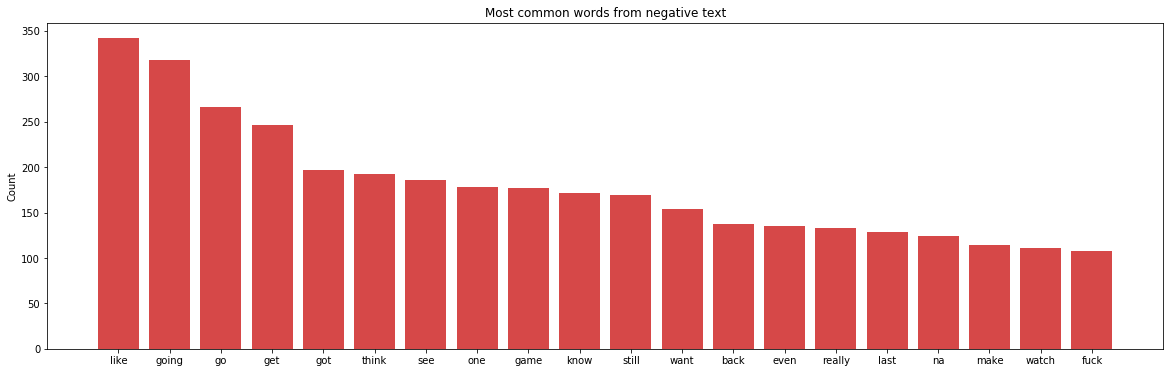

In [170]:
import collections
from collections import Counter 
from matplotlib.pyplot import figure

data_set =negative_text 
  
# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts.

most_occur = Counter.most_common(20) 
value_list=[]
count_list=[]

for value,count in most_occur:
    value_list.append(value)
    count_list.append(count)

y_positions=range(len(value_list))

plt.bar(y_positions,count_list,color=(0.8, 0.1, 0.1,0.8))
plt.xticks(y_positions,value_list)
plt.ylabel("Count")
plt.title("Most common words from negative text")
plt.rcParams['figure.figsize']=(20,6)
plt.show()

### Project the most common words in neutral tweets

<Figure size 1440x432 with 0 Axes>

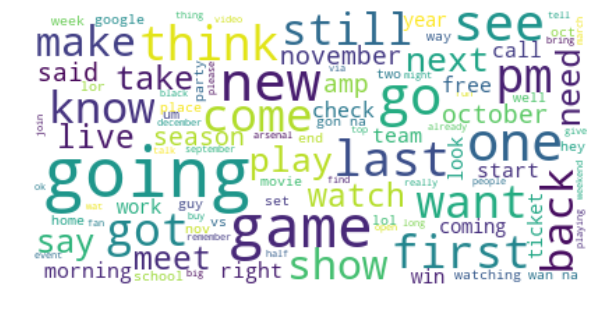

In [171]:
df['twitter_text']=cleaned_list
neutral_list=[]
for index, row in df.iterrows():
    if (row['category']=="neutral"):
        neutral_list.append(row['twitter_text'])
        
neutral_text=' '.join(neutral_list)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(neutral_text)
plt.figure()
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

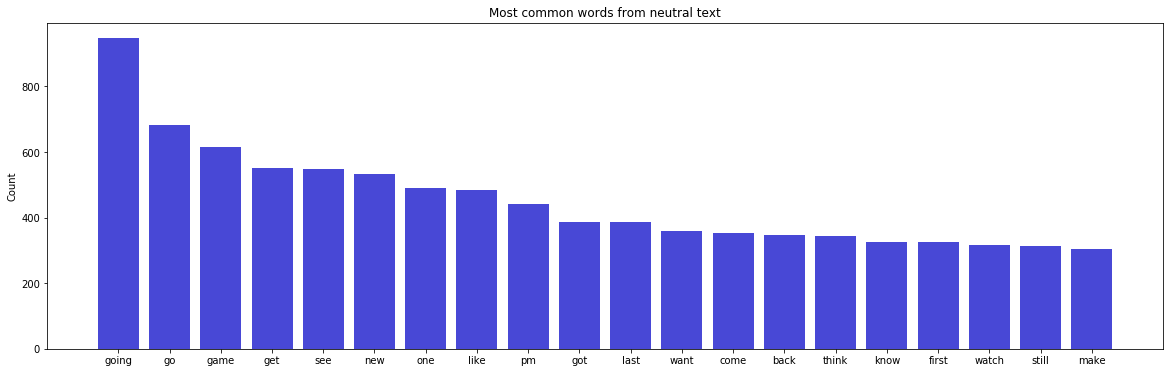

In [172]:
import collections
from collections import Counter 
from matplotlib.pyplot import figure

data_set =neutral_text 
  
# split() returns list of all the words in the string 
split_it = data_set.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts.

most_occur = Counter.most_common(20) 
value_list=[]
count_list=[]

for value,count in most_occur:
    value_list.append(value)
    count_list.append(count)

y_positions=range(len(value_list))

plt.bar(y_positions,count_list,color=(0.1, 0.1, 0.8,0.8))
plt.xticks(y_positions,value_list)
plt.ylabel("Count")
plt.title("Most common words from neutral text")
plt.rcParams['figure.figsize']=(20,6)
plt.show()

### Plot avarage word count per category
Plot the avarage count of negative,positive,neutraltext in bar plot

In [173]:
from __future__ import division
category_list=list(df['category'])
text_list=list(df['twitter_text'])

positive_word_count=0
positive_text_count=0

negative_word_count=0
negative_text_count=0

neutral_word_count=0
neutral_text_count=0
for i in range(len(text_list)):
    if (category_list[i]=='positive'):
        positive_word_count=positive_word_count+len(text_list[i])
        positive_text_count=positive_text_count+1
    if (category_list[i]=='negative'):
        negative_word_count=negative_word_count+len(text_list[i])
        negative_text_count=negative_text_count+1
    if(category_list[i]=='neutral'):
        neutral_word_count=neutral_word_count+len(text_list[i])
        neutral_text_count=neutral_text_count+1
        
labels_list=['positive','negative','neutral']
avarage_list=[positive_word_count/positive_text_count,negative_word_count/negative_text_count,neutral_word_count/neutral_text_count]

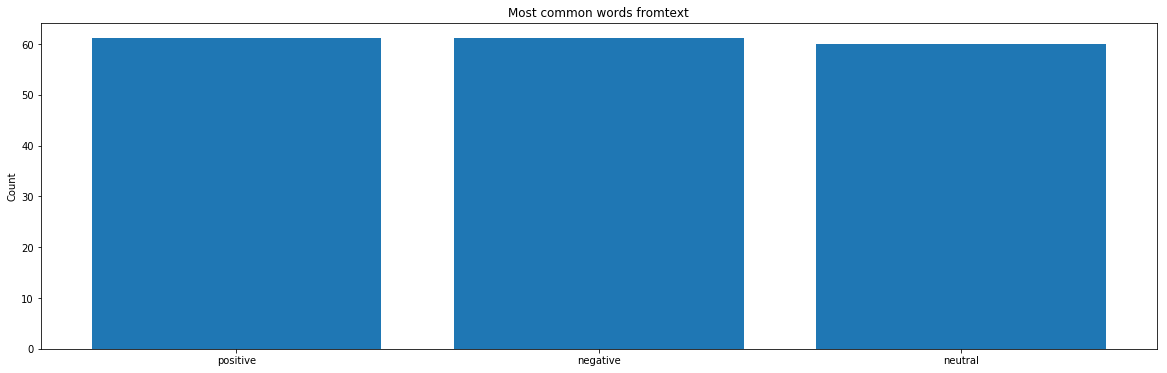

In [174]:
import collections
from collections import Counter 
from matplotlib.pyplot import figure

y_positions=range(len(labels_list))
plt.bar(y_positions,avarage_list)
plt.xticks(y_positions,labels_list)
plt.ylabel("Count")
plt.title("Most common words fromtext")
plt.rcParams['figure.figsize']=(20,6)
axes = plt.gca()
plt.show()

We observe that the average word_count for neutral,negative,positive is almost equal,so it's not helpful for classification

# KNN Algorithm
The k-nearest neighbors algorithm classifies an object  by a plurality vote of its neighbors

In [175]:
#train_test_split function properly splits dataset into train and test section,X_train containsthe data
#to be trained ,the X_test contains the data to be tested ,y_train contains the labels to be trained 
#and the y_test the labels to be tested 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['twitter_text'],df['category'], test_size=0.2)


### CountVectorization
CountVectorization creates  vectors that have a dimensionality equal to the size of our vocabulary, and if the text has a word from the vocabulary, we will put 1 in that dimension. Every time we come across that word , we will add plus 1, leaving 0 to the positions we didin't find a word from vocabulary.


In [176]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=2000,stop_words='english') #max_features=vector_dimension 
#we choose 2000 after trying values between [500-3000]
X_train_CV= vectorizer.fit_transform(X_train) #X_train_CV will contain a vector for every tweetin train section
X_test_CV=vectorizer.fit_transform(X_test) #X_test_CV will contain a vectory for every tweet in test section

In [177]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

#Test a part of train2017.tsv
classifier = KNeighborsClassifier(n_neighbors=50) #we choose 50 after trying values between[3-100] 
classifier.fit(X_train_CV, y_train)
y_pred = classifier.predict(X_test_CV)  
display(accuracy_score(y_test,y_pred))

0.4302575107296137

In [178]:
X_train_CV= vectorizer.fit_transform(df['twitter_text']) 
X_test_CV=vectorizer.fit_transform(df_test['twitter_text']) 

In [179]:
#Test the test2017.tsv file 
y_train=list(df['category'])
y_test=list(df_labels['category'])
y_pred = classifier.predict(X_test_CV)  
KNN_CV_accuracy_score=accuracy_score(y_test,y_pred)
KNN_CV_f1_score=f1_score(y_test,y_pred,average='macro') #[avarage='micro']=accuracy_score
display(KNN_CV_accuracy_score)
display(KNN_CV_f1_score)


0.4821719309671117

0.21817617510858475

### Test for overfitting
The accuracy score of the file test2017.tsv is better than the test-part of train2017.tsv.This means that our model isn't overfitting.(Overfitting is when a model is realy good at guessing it's own dataset and really bad at new ones) 

### TF-IDF
The idea behind it is that if a word occurs multiple times in a document, we should boost its relevance as it should be more meaningful than other words that appear fewer times (TF). At the same time, if a word occurs many times in a document but also along many other documents, maybe it is because this word is just a frequent word; not because it was relevant or meaningful (IDF).

In [180]:
X_train, X_test, y_train, y_test = train_test_split(df['twitter_text'],df['category'], test_size=0.2)

In [181]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000,stop_words='english') #max_features=vector dimension
#we observed as max feature inreases the accuracy decreases
X_train_TF = vectorizer.fit_transform(X_train)
X_test_TF=vectorizer.fit_transform(X_test)

In [182]:
classifier = KNeighborsClassifier(n_neighbors=50)  
classifier.fit(X_train_TF, y_train)
y_pred = classifier.predict(X_test_TF)  
display(accuracy_score(y_test,y_pred))

0.4241773962804006

In [183]:
X_train_TF = vectorizer.fit_transform(df['twitter_text'])
X_test_TF=vectorizer.fit_transform(df_test['twitter_text'])

In [184]:
#Test the test2017.tsv file 
y_train=list(df['category'])
y_test=list(df_labels['category'])
y_pred = classifier.predict(X_test_TF) 
KNN_TF_accuracy_score=accuracy_score(y_test,y_pred)
KNN_TF_f1_score=f1_score(y_test,y_pred,average='macro')
display(KNN_TF_accuracy_score)
display(KNN_TF_f1_score)


0.4830674047541517

0.21717171717171715

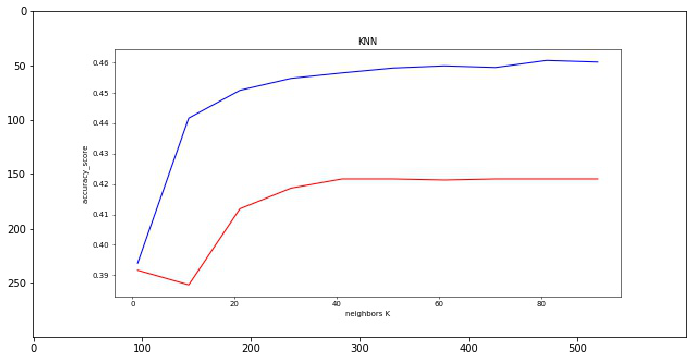

In [185]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('KNN_neighbors.jpeg')
imgplot = plt.imshow(img)

Plot that shows how the accuracy is changinng when the neighbor count is getting bigger in KNN 
The red line is for the Bag-of-words method
The blue line is for the TF-IDF method

### Test for overfitting
The accuracy score of the file test2017.tsv is better than the test-part of train2017.tsv.This means that our model isn't overfitting.(Overfitting is when a model is realy good at guessing it's own dataset and really bad at new ones)


### Embendings
Embendings takes into consideration the enviroment of a word and not just the word itself and creates a vocabulary that for every word has a vector of the wanted dimension.

In [186]:
X_train, X_test, y_train, y_test = train_test_split(df['twitter_text'],df['category'], test_size=0.20) 
print len(df['twitter_text'])

In [187]:
import gensim
tokenized_tweet =df['twitter_text'].apply(lambda x: x.split()) # tokenizing
#print(len(tokenized_tweet))
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=300, # desired no. of features/independent variables
            window=3, # context window size
            min_count=1,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34) 

model_w2v.train(tokenized_tweet, total_examples= len(df['twitter_text']), epochs=20)

(5294331, 5408660)

In [57]:
def tweet_vectorization(text,dimension):
    tweet_vector_list=[]
    for row in text: #for every tweet in the whole dataset
        tokens = word_tokenize(row) #tokenize the tweet
        tweet_2d_array= np.zeros(shape=(dimension,len(tokens))) #make a 2d numpy array
        x=0;
        y=0;

        for token in tokens:
            x=0
            if token in model_w2v.wv.vocab:
                for num in model_w2v[token]: #if token is in the models vocab copy paste its vector to the 
                    tweet_2d_array[x,y]=num  # tokens column
                    x=x+1
            
            else:
                for num in range(dimension): #else put 
                    tweet_2d_array[x,y]=0
                    x=x+1
                
            y=y+1
             
        tweet_1d_array= np.zeros(dimension)
        for index in range(dimension):
            sum_word=0
            for y in range(len(tokens)):
                sum_word=sum_word+tweet_2d_array[index,y]
            if(len(tokens)!=0):
                tweet_1d_array[index]=sum_word/len(tokens)
            else:
                tweet_1d_array[index]=1
        tweet_vector_list.append(tweet_1d_array)
    return tweet_vector_list

In [58]:
X_train, X_test, y_train, y_test = train_test_split(df['twitter_text'],df['category'], test_size=0.2)

In [59]:
X_train_vector=tweet_vectorization(X_train,300) #X_train vector contains a 300-dim array 
X_test_vector=tweet_vectorization(X_test,300)

/home/panagiota/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


In [60]:
classifier = KNeighborsClassifier(n_neighbors=100)  
classifier.fit(X_train_vector, y_train)
y_pred = classifier.predict(X_test_vector)  
display(accuracy_score(y_test,y_pred))

0.5720672389127325

In [61]:
import sys 
reload(sys)
sys.setdefaultencoding("utf-8")
X_train_vector_T=tweet_vectorization(df['twitter_text'],300)
X_test_vector_T=tweet_vectorization(df_test['twitter_text'],300)

In [62]:
#Test the test2017.tsv file 
y_train=list(df['category'])
y_test=list(df_labels['category'])
y_pred = classifier.predict(X_test_vector_T) 
KNN_Emb_accuracy_score=accuracy_score(y_test,y_pred)
KNN_Emb_f1_score=f1_score(y_test,y_pred,average='macro')
display(KNN_Emb_accuracy_score)
display(KNN_Emb_f1_score)

0.48542819928362096

0.23141373776115526

### Test for overfitting
The accuracy score to the unknown dataset test2017.tsv is much smaller than the one from the known data test2017.tsv,this indicates that we have overfitting.A way to solve this problem is to use cross validation
Cross validaation(10) splits the training set into 10 diferrent test-train sets and trains the model.Word2vec-SVM implementation is really slow and it's not possible to run this 10 times in a row.

In [63]:
import sklearn
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        plt.figure(figsize=(16, 16)) 
        for i in range(len(x)):
            plt.scatter(x[i],y[i])
            plt.annotate(labels[i],xy=(x[i], y[i]),xytext=(5, 2),textcoords='offset points',ha='right',va='bottom')
    plt.show()

In [64]:
#tsne_plot(model_w2v)

# SVM Algorithm
The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

### CountVectorization
CountVectorization creates  vectors that have a dimensionality equal to the size of our vocabulary, 
and if the text has a word from the vocabulary, we will put 1 in that dimension. Every time we come across that word , we will add plus 1, leaving 0 to the positions we didin't find a word from vocabulary.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df['twitter_text'],df['category'], test_size=0.2)

In [89]:
vectorizer = CountVectorizer(max_features=1500,stop_words='english') #we choose this value after we test values in rang[100-3000]
X_train_CV= vectorizer.fit_transform(X_train)
X_test_CV=vectorizer.fit_transform(X_test)

In [90]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_CV, y_train)  
y_pred = svclassifier.predict(X_test_CV)
display(accuracy_score(y_test,y_pred))

0.43276108726752505

In [91]:
X_train_CV= vectorizer.fit_transform(df['twitter_text'])
X_test_CV=vectorizer.fit_transform(df_test['twitter_text'])

In [92]:
#Test the test2017.tsv file 
y_train=list(df['category'])
y_test=list(df_labels['category'])
y_pred = svclassifier.predict(X_test_CV)
SVM_CV_accuracy_score=accuracy_score(y_test,y_pred)
SVM_CV_f1_score=f1_score(y_test,y_pred,average='macro')
display(SVM_CV_accuracy_score)
display(SVM_CV_f1_score)

0.4056496255291436

0.3265062625738722

### TF-IDF
The idea behind it is that if a word occurs multiple times in a document, we should boost its relevance as it should be more meaningful than other words that appear fewer times (TF). At the same time, if a word occurs many times in a document but also along many other documents, maybe it is because this word is just a frequent word; not because it was relevant or meaningful (IDF).

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df['twitter_text'],df['category'], test_size=0.2)

In [94]:
vectorizer = TfidfVectorizer(max_features=1500,stop_words='english') #we choose this value after we test values 
X_train_TF = vectorizer.fit_transform(X_train)
X_test_TF=vectorizer.fit_transform(X_test)

In [95]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_TF, y_train)  
y_pred = svclassifier.predict(X_test_TF)  
display(accuracy_score(y_test,y_pred)) 

0.4248927038626609

In [96]:
vectorizer = TfidfVectorizer(max_features=1500,stop_words='english')
X_train_TF= vectorizer.fit_transform(df['twitter_text'])
X_test_TF=vectorizer.fit_transform(df_test['twitter_text'])

In [97]:
#Test the test2017.tsv file 
y_train=list(df['category'])
y_test=list(df_labels['category']) 
y_pred = svclassifier.predict(X_test_TF)
SVM_TF_accuracy_score=accuracy_score(y_test,y_pred)
SVM_TF_f1_score=f1_score(y_test,y_pred,average='macro')
display(SVM_TF_accuracy_score)
display(SVM_TF_f1_score)

0.40524259198957996

0.30573245129070376

### Embendings
Embendings takes into consideration the enviroment of a word and not just the word itself and creates a vocabulary that for every word has a vector of the wanted dimension.

In [141]:
X_train, X_test, y_train, y_test = train_test_split(df['twitter_text'],df['category'], test_size=0.2)

In [142]:
X_train_vector=tweet_vectorization(X_train,300) #X_train vector contains a 300-dim array 
X_test_vector=tweet_vectorization(X_test,300)

In [143]:
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train_vector, y_train)  
y_pred = svclassifier.predict(X_test_vector) 
display(accuracy_score(y_test,y_pred))

0.6165951359084406

In [144]:
X_train_vector_T=tweet_vectorization(df['twitter_text'],300)
X_test_vector_T=tweet_vectorization(df_test['twitter_text'],300)

In [145]:
y_train=list(df['category'])
y_test=list(df_labels['category']) 
y_pred = svclassifier.predict(X_test_vector_T)
SVM_Emb_accuracy_score=accuracy_score(y_test,y_pred)
SVM_Emb_f1_score=f1_score(y_test,y_pred,average='macro')
display(SVM_TF_accuracy_score)
display(SVM_TF_f1_score)

0.40524259198957996

0.30573245129070376

### Test for overfitting
The accuracy score to the unknown dataset test2017.tsv is much smaller than the one from the known data test2017.tsv,this indicates that we have overfitting.A way to solve this problem is to use cross validation
Cross validaation(10) splits the training set into 10 diferrent test-train sets and trains the model.Word2vec-SVM implementation is really slow and it's not possible to run this 10 times in a row.

In [112]:
d = {'Algorithm': ["KNN", "SVM"], 'Bag_of_words': [KNN_CV_accuracy_score,SVM_CV_accuracy_score],'TF_IDF': [KNN_TF_accuracy_score,SVM_TF_accuracy_score],'Word_2Vec':[KNN_Emb_accuracy_score,SVM_Emb_accuracy_score]}

In [121]:
df = pd.DataFrame(data=d)
display(df)

,Algorithm,Bag_of_words,TF_IDF,Word_2Vec
0,KNN,0.482986,0.483230,0.485428
1,SVM,0.405650,0.405243,0.403614


This dataframe displays the scores from test2017.tsv 

## Add  features

In [150]:
X_train, X_test, y_train, y_test = train_test_split(df['twitter_text'],df['category'], test_size=0.2)  

In [151]:
vectorizer = CountVectorizer(max_features=2000,stop_words='english')
X_train_CV= vectorizer.fit_transform(X_train)
X_test_CV=vectorizer.fit_transform(X_test)

In [152]:
def add_lexica(lexica_directory,lexica,text):
    df = pd.read_table('Project/lexica/'+lexica_directory+"/"+lexica,sep='\t', names=('word', 'value'))
    average_sentiment_list=[]
    for tweet in text:
        print(tweet)
        tokens=word_tokenize(tweet)
        sentiment_sum=0
        word_count=0
        for token in tokens:
            if((token==df['word']).any()): #if token exists in moel vocab
                val=df.loc[df['word'] == token, 'value'].iloc[0] #get the sentiment value
                word_count=word_count+1
                sentiment_sum=sentiment_sum+int(val)
        if(word_count!=0): #if at least one token from sentence exists in the vocab
        
            average_sentiment=sentiment_sum/word_count
            average_sentiment_list.append(average_sentiment)   
        
        else:
        
            average_sentiment_list.append(0)  
            
    return average_sentiment_list #avarage_sentiment_list contains 
                

Add avarage_sentiment from lexica affin

In [153]:
list_train=add_lexica("affin","affin.txt",X_train)
list_test=add_lexica("affin","affin.txt",X_test)

In [154]:
from numpy import array
lexica_vec_train=array(list_train)
lexica_vec_train=lexica_vec_train.reshape(lexica_vec_train.shape[0],1)
lexica_vec_test=array(list_test)
lexica_vec_test=lexica_vec_test.reshape(lexica_vec_test.shape[0],1)

Bag_of_words implementation produes a sparse matrix so we have to use sparse matrix operations

In [155]:
from scipy.sparse import coo_matrix,hstack
train_array=hstack([X_train_CV,lexica_vec_train]).toarray()
test_array=hstack([X_test_CV,lexica_vec_test]).toarray()

We tested the add_lexica for KNN algorithm and it result to a much better accuracy


In [158]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score


classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(train_array, y_train)
y_pred = classifier.predict(test_array)  
display(accuracy_score(y_test,y_pred))

0.5280758226037195

We observe that by aading the avarage sentiment of a tweeet text we increase the accuracy score

Πλευράκη Μυρτώ : 1115201500132

Καμπύλη Παναγιώτα : 1115201500060
